<h1>Librerías</h1>

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose  import ColumnTransformer

<h2> Carga de data </h2>

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.shape

(891, 12)

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h2><b>Análisis exploratorio</b></h2>

<h3>Eliminación de variables</h3>
<ul>
  <li>Se elimina PassengerId porque es una variable de tipo ID</li>
  <li>Se elimina Name ya que no se requiere para el modelo </li>
</ul>

In [10]:
df.drop(columns = ['PassengerId','Name'],inplace = True)

<h3><b>Distribución de variable objetivo</b></h3>
<p>Para verificar si las clases están desbalanceadas</p>

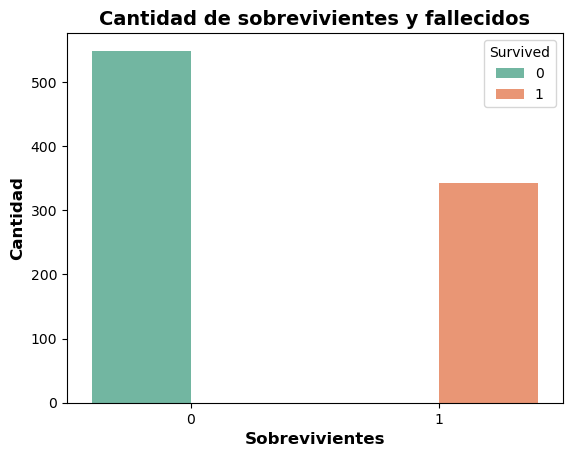

In [11]:
sns.countplot(df,x='Survived',hue = 'Survived',palette= 'Set2')
plt.title('Cantidad de sobrevivientes y fallecidos',fontsize=14,fontweight='bold')
plt.ylabel('Cantidad',fontsize=12,fontweight='bold')
plt.xlabel('Sobrevivientes',fontsize=12,fontweight='bold')
plt.show()

<h2><b>Análisis univariado</b></h2>

<h2><b>Variables numéricas</b></h2>

In [12]:
data = df.drop(columns='Survived')
lista_numerica = [col for col in data.select_dtypes('number').columns]
lista_numerica

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

<h2><b>Distribución de la edad de pasajeros</b></h2>
<p>Corresponde a una <b>variable de tipo discreta</b>, ya que solo puede tomar valores enteros</p>
<br>
<ul>
<li>El <b>histograma</b> se realiza para saber la <b>distribución</b> de los datos y determinar la mejor forma de <b>imputar</b> los valores <b>nulos</b>, en este caso se ve que <b>la distribución tiene un sesgo a la derecha</b>, por lo que <b>es más representativa la mediana</b> que el promedio.</li>
<br>
<li>En cuanto al <b>boxplot</b>, se realiza para determinar si existen valores <b>outliers</b>, los cuales se ubican fuera de los bigotes como se ve en el gráfico, pero con esta variable en particular esos valores no corresponden a outliers, ya que es posible encontrar personas mayores a 60 años.</li>

</ul>

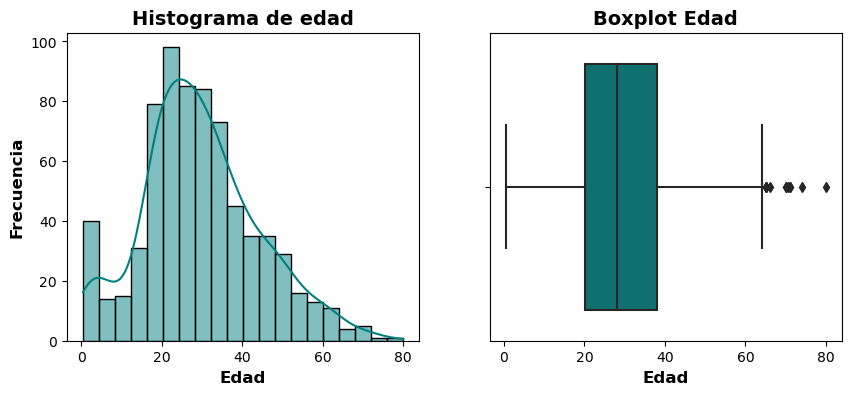

In [13]:
fig,ax = plt.subplots(1,2,figsize = (10,4))
sns.histplot(df,x='Age',kde = True,color = 'teal',ax=ax[0])
ax[0].set_title('Histograma de edad',fontsize = 14,fontweight = 'bold')
ax[0].set_xlabel('Edad',fontsize = 12,fontweight = 'bold')
ax[0].set_ylabel('Frecuencia',fontsize = 12,fontweight = 'bold')
sns.boxplot(df,x='Age',color = 'teal',ax=ax[1])
ax[1].set_title('Boxplot Edad',fontsize = 14,fontweight = 'bold')
ax[1].set_xlabel('Edad',fontsize = 12,fontweight = 'bold')
plt.show()

<h1>Análisis Bivariado</h1>

<h2><b>Gráficos para pclass</b></h2>
<ul>
<li>La <b>variable</b> es de tipo <b>discreta</b></li>
<li>La mayor cantidad de pasajeros corresponden a <b>tercera clase</b></li>
<li>En proporción la mayor cantidad de <b>sobreviventes</b> con respecto a su clase es la <b>primera</b></li>
</ul>


In [14]:
df.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

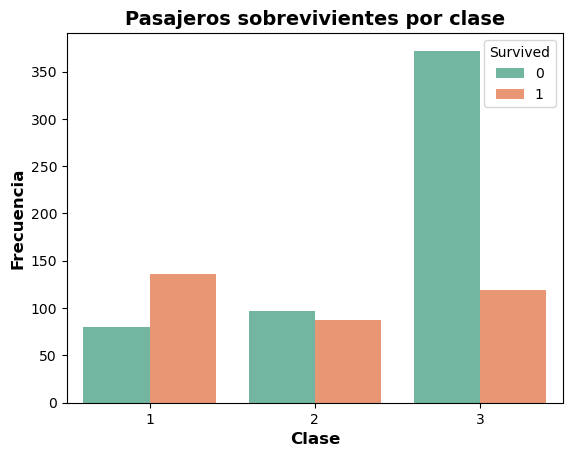

In [15]:
sns.countplot(df,x='Pclass',hue = 'Survived',palette='Set2')
plt.title('Pasajeros sobrevivientes por clase',fontsize = 14,fontweight = 'bold')
plt.xlabel('Clase',fontsize = 12,fontweight = 'bold')
plt.ylabel('Frecuencia',fontsize = 12,fontweight = 'bold')
plt.show()

<h1>Construcción de una nueva variable</h1>
<h4>Considerando que la mayor cantidad de pasajeros viajaba sin familiares y, además tanto la variable Parch como SibSp representan algo similar, se construirá una nueva variable que indique si viajaban o no solos</h4>

In [16]:
df['Familia'] = ((df['SibSp'] + df['Parch']) > 0).astype(int)

#Eliminar las dos columnas
df.drop(columns = ['SibSp','Parch'],inplace = True)

<h1>Gráficos para la variable Familia</h1>
<ul>
<li>La mayoría de personas viajaron <b>solas</b></li>
<li>En proporción las personas que iban con al menos un familiar tenían una probabilidad de <b>sobrevivir</b> de casi el <b>50%</b></li>
</ul>

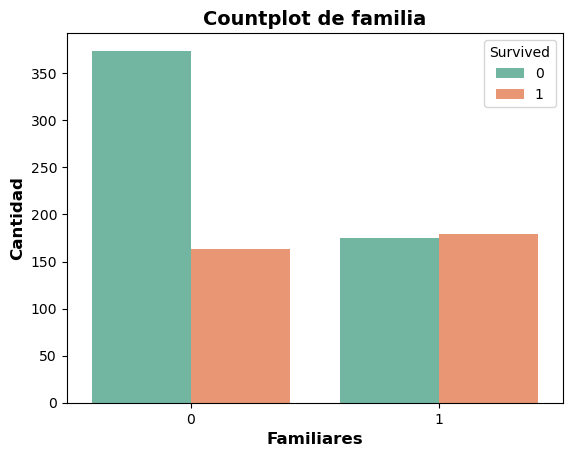

In [17]:
sns.countplot(df,x='Familia',hue = 'Survived',palette='Set2')
plt.title('Countplot de familia',fontsize = 14,fontweight = 'bold')
plt.xlabel('Familiares',fontsize = 12,fontweight = 'bold')
plt.ylabel('Cantidad',fontsize = 12,fontweight = 'bold')
plt.show()

<h1>Gráficos para la variable Sex</h1>
<ul>
<li>La mayoría de pasajeros eran hombres</li>
<li>La mayoría de pasajeros que sobrevivieron eran mujeres</li>
</ul>

In [18]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

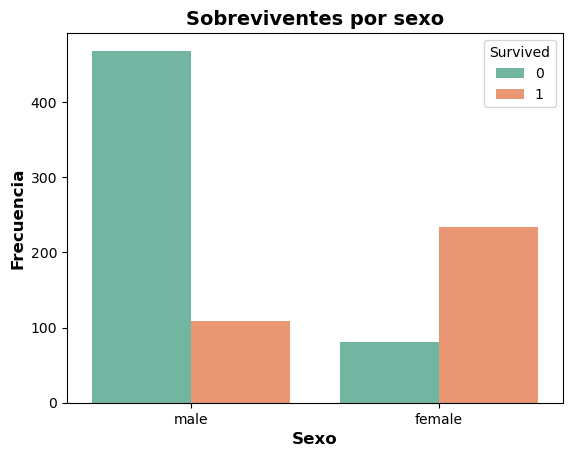

In [19]:
sns.countplot(df,x='Sex',hue='Survived',palette='Set2')
plt.title('Sobreviventes por sexo',fontsize = 14,fontweight = 'bold')
plt.xlabel('Sexo',fontsize = 12,fontweight = 'bold')
plt.ylabel('Frecuencia',fontsize = 12,fontweight = 'bold')
plt.show()

<h1>Gráfico de distribución de la edad respecto a la sobrevivencia</h1>
<ul>
<li>En el grupo de sobrevivientes se puede apreciar que sobrevivieron la mayoría de personas menores de edad</li>
</ul>

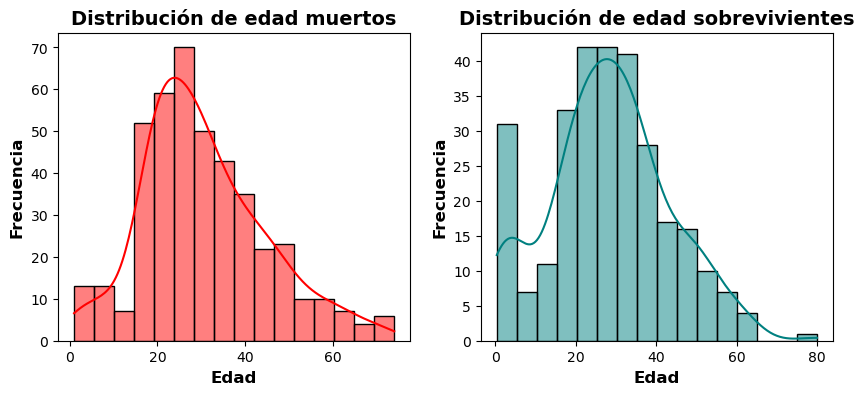

In [61]:
fig,ax = plt.subplots(1,2,figsize = (10,4))
sns.histplot(df[df['Survived']==0],x='Age',kde=True,ax=ax[0],color='red')
ax[0].set_title('Distribución de edad muertos',fontsize = 14,fontweight = 'bold')
ax[0].set_xlabel('Edad',fontsize = 12,fontweight = 'bold')
ax[0].set_ylabel('Frecuencia',fontsize = 12,fontweight = 'bold')
sns.histplot(df[df['Survived']==1],x='Age',kde=True,ax=ax[1],color='teal')
ax[1].set_title('Distribución de edad sobrevivientes',fontsize = 14,fontweight = 'bold')
ax[1].set_xlabel('Edad',fontsize = 12,fontweight = 'bold')
ax[1].set_ylabel('Frecuencia',fontsize = 12,fontweight = 'bold')
plt.show()




<h1>Gráfico de correlaciones</h1>
<ul>
<li>Para visualizar la correlación entre las variables se utilizó un mapa de color con una paleta divergente</li>
<li>Los colores con un rojo más intenso indican que tienen una correlación alta positiva</li>
<li>Los colores más claros indican que no hay una correlación</li>
<li>Mientras que los colores más azules indican una correlación negativa</li>
<li>En este caso solo se evidencia cierta correlación entre la clase y el precio del ticket</li>
</ul>

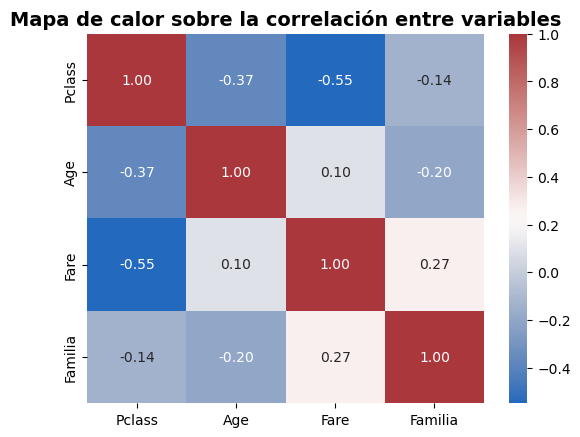

In [32]:
sns.heatmap(df.drop(columns = 'Survived').corr(numeric_only=True),annot=True,fmt='.2f',cmap='vlag')
plt.title('Mapa de calor sobre la correlación entre variables',fontsize = 14,fontweight = 'bold')
plt.show()

In [21]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Ticket', 'Fare', 'Cabin',
       'Embarked', 'Familia'],
      dtype='object')

<h1>Pipeline de procesamiento de datos</h1>
<h3>En esta sección se realizarán todas las transformaciones necesarias para la generación del modelo de clasificación</h3>

In [67]:
data = df.drop(columns = ['Ticket','Cabin'])
data = data.dropna(subset='Embarked')

In [71]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Familia'], dtype='object')

<h2>Dividir los datos en un conjunto de entrenamiento y test</h2>

In [72]:
X = data.drop(columns = 'Survived')
y = data['Survived']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


<h1>Imputar valores nulos</h1>

<h2>